In [54]:
!pip3 install torch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [55]:
import torch

Intro

In [56]:
w = torch.tensor(3.0, requires_grad=True)
b = torch.tensor(1.0, requires_grad=True) #bias

In [57]:
def forward(x):
  y = w * x + b
  return y

In [58]:
x = torch.tensor([[4],[7]])
forward(x)

tensor([[13.],
        [22.]], grad_fn=<AddBackward0>)

Torch Linear Model

In [59]:
# import torch
from torch.nn import Linear

In [60]:
torch.manual_seed(1) # setting seed per generare w e b casualmente
model = Linear(in_features=1, out_features=1) # 1 input 1 output
print(model.bias, model.weight) #stampa bias e weight

Parameter containing:
tensor([-0.4414], requires_grad=True) Parameter containing:
tensor([[0.5153]], requires_grad=True)


In [61]:
x = torch.tensor([ [2.0], [3.3]])
model(x)

tensor([[0.5891],
        [1.2590]], grad_fn=<AddmmBackward0>)

Custom Modules

In [76]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

Text(0.5, 0, 'x')

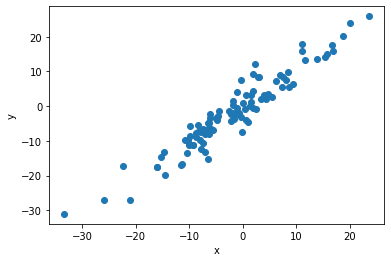

In [77]:
# Making a synthetic Dataset
# tensore con numeri casuali
torch.manual_seed(1) # settare un seed fisso
X = torch.randn(100, 1) * 10 # vettore di valori in una matrice  
y = X + 3 * torch.randn(100,1) # etichette random
plt.plot(X.numpy(), y.numpy(), 'o')
plt.ylabel('y')
plt.xlabel('x')

In [78]:
class LR (nn.Module): # estendo nn.module
  def __init__(self, input_size, output_size): #overloading 
    super().__init__()
    self.linear = nn.Linear(input_size, output_size)
  def forward(self, x):
    pred = self.linear(x) # pred -> prediction
    return pred

In [79]:
torch.manual_seed(1)
model = LR(1,1)
# print(list(model.parameters()))
print(model)

LR(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)


In [80]:
# x = torch.tensor([[1.0], [2.0]])
# model.forward(x)

In [81]:
[w, b] = model.parameters()
#print(w, b)
# wl = w[0][0].item( )
# bl = b[0].item()
# print(wl, bl)

def get_params():
  return (w[0][0].item(), b[0].item())

In [82]:
def plot_fit(title):
  plt.title = title
  wl, bl = get_params()
  x1 = np.array([-30, 30])
  y1 = wl*x1 + bl
  plt.plot(x1, y1, 'r')
  plt.scatter(X, y)
  plt.show()

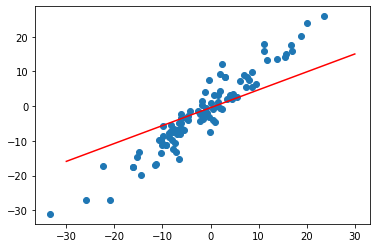

In [83]:
plot_fit('Initial model')

Loss Function